In [91]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

**Final test score: 0.648**

**Metric used: Recall**

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [298]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import shap 

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1.)

We chose the first option: the Default of Credit Card Clients Dataset. This dataset presents an engaging challenge, particularly because classification problems and classification metrics have been areas of struggle for us. Working with this dataset provides an excellent opportunity to improve those skills and address our weaknesses. Additionally, this problem has real-world applications, as it involves building a model that can predict an individual's ability to pay their credit card bill—a scenario many people face. Predictions like these hold significant business value for financial institutions, aiding in risk assessment and decision-making processes.


2.) 

Some immediate observations I have made looking at the dataset and reading the documentation on kaggle:
- The target variable, labeled "default.payment.next.month," indicates if a client will default in October (1 = will default, 0 = won’t default).
- The "PAY_0" feature should be renamed to "PAY_1" for consistency with the other monthly features, where 1 through 6 represent the months from September to April.
- The dataset contains 30,000 examples and 24 features, which can be split into two main sections:
  - Demographic and personal details: Includes the client ID, credit limit in NT dollars, gender, education level, marital status, and age—six features in total.
  - Usage and payment history: Contains repayment status, bill amount, and payment amount for each of the past six months, amounting to 18 features.


In [257]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0000,2,2,1,24,2,2,-1,-1,-2,...,0.0000,0.0000,0.0000,0.0000,689.0000,0.0000,0.0000,0.0000,0.0000,1
2,120000.0000,2,2,2,26,-1,2,0,0,0,...,3272.0000,3455.0000,3261.0000,0.0000,1000.0000,1000.0000,1000.0000,0.0000,2000.0000,1
3,90000.0000,2,2,2,34,0,0,0,0,0,...,14331.0000,14948.0000,15549.0000,1518.0000,1500.0000,1000.0000,1000.0000,1000.0000,5000.0000,0
4,50000.0000,2,2,1,37,0,0,0,0,0,...,28314.0000,28959.0000,29547.0000,2000.0000,2019.0000,1200.0000,1100.0000,1069.0000,1000.0000,0
5,50000.0000,1,2,1,57,-1,0,-1,0,0,...,20940.0000,19146.0000,19131.0000,2000.0000,36681.0000,10000.0000,9000.0000,689.0000,679.0000,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [258]:
train_df, test_df = train_test_split(credit_df, train_size=0.7, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

To perform EDA on the training set, we’ll rely on three main sources: the information and discussions available on the Kaggle website, train_df.describe(), which provides a summary of all columns in the training DataFrame, and train_df.info(), which gives insights into the DataFrame's structure and characteristics.

In [259]:
data_info = train_df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   SEX                         21000 non-null  int64  
 2   EDUCATION                   21000 non-null  int64  
 3   MARRIAGE                    21000 non-null  int64  
 4   AGE                         21000 non-null  int64  
 5   PAY_0                       21000 non-null  int64  
 6   PAY_2                       21000 non-null  int64  
 7   PAY_3                       21000 non-null  int64  
 8   PAY_4                       21000 non-null  int64  
 9   PAY_5                       21000 non-null  int64  
 10  PAY_6                       21000 non-null  int64  
 11  BILL_AMT1                   21000 non-null  float64
 12  BILL_AMT2                   21000 non-null  float64
 13  BILL_AMT3                   2100

In [260]:
credit_summary = train_df.describe().T
credit_summary

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,21000.0000,167880.6514,130202.6822,10000.0000,50000.0000,140000.0000,240000.0000,1000000.0000
SEX,21000.0000,1.6008,0.4898,1.0000,1.0000,2.0000,2.0000,2.0000
EDUCATION,21000.0000,1.8521,0.7930,0.0000,1.0000,2.0000,2.0000,6.0000
MARRIAGE,21000.0000,1.5540,0.5217,0.0000,1.0000,2.0000,2.0000,3.0000
AGE,21000.0000,35.5008,9.2126,21.0000,28.0000,34.0000,41.0000,79.0000
PAY_0,21000.0000,-0.0154,1.1205,-2.0000,-1.0000,0.0000,0.0000,8.0000
PAY_2,21000.0000,-0.1371,1.1945,-2.0000,-1.0000,0.0000,0.0000,8.0000
PAY_3,21000.0000,-0.1716,1.1961,-2.0000,-1.0000,0.0000,0.0000,8.0000
PAY_4,21000.0000,-0.2252,1.1686,-2.0000,-1.0000,0.0000,0.0000,8.0000
PAY_5,21000.0000,-0.2644,1.1372,-2.0000,-1.0000,0.0000,0.0000,8.0000


**Observations:**

Firstly, it is important to address naming consistency among features. The feature PAY_0 should be renamed to PAY_1 to align it with other payment-related features, such as BILL_AMT1 and PAY_AMT1. This change will promote clarity and uniformity within the dataset.

Secondly, the EDUCATION feature contains values that categorize educational attainment: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). The presence of two categories labelled as "unknown" presents a challenge, suggesting a need to merge values 5 and 6 for better coherence and interpretation.

Furthermore, each numeric feature in the dataset exhibits different ranges, highlighting the necessity for specific transformations during preprocessing. For example, the SEX feature requires one-hot encoding to properly represent categorical data, while the AGE feature will need scaling to ensure comparability with other numerical values.

Additionally, the repayment status feature (PAY_x) has an intriguing minimum value of -2. While the Kaggle description does not clarify this designation, discussions suggest that -2 corresponds to instances where there is no credit to pay. In contrast, a value of 0 indicates that a payment was made on time but did not cover the total amount due.

Moreover, the binary values within the sex feature are encoded using 1-indexing, meaning they are represented as '1' and '2' instead of the more conventional '0' and '1'. This approach could lead models to misinterpret these values as ordinal or continuous data rather than categorical. To mitigate this issue, applying one-hot encoding will appropriately categorize the binary values.

Lastly, an interesting observation from the data reveals a positive correlation between BILL_AMT and PAY_AMT. In the provided dataset, the mean PAY_AMT consistently exceeds the mean BILL_AMT and increases concurrently with it, suggesting a potential relationship worth exploring further.

In summary, this exploratory data analysis outlines key characteristics of the dataset, identifies potential issues regarding feature naming and encoding, and provides insights into the relationships between features. These findings will serve as a foundation for the next steps in preprocessing and model development, guiding us toward more effective analysis and predictions.

In [261]:
...

Ellipsis

**Two Summary Statistics we find important:**
1. The dataset consists of 24 features, all classified as either float64 or int64 types, with no null values present. This indicates that imputation is unnecessary in the preprocessing step
2. This is a class imbalance problem. The proportions indicate that approximately 77.7% of the observations belong to the non-default class (0), while only about 22.3% belong to the default class (1). 

In [262]:
train_df["default.payment.next.month"].value_counts(normalize=True)

default.payment.next.month
0   0.7768
1   0.2232
Name: proportion, dtype: float64

In [263]:
...

Ellipsis

We would like to illustrate how AGE, MARRIAGE, and LIMIT_BAL relate to default payments:
1. The right-skewed histogram for age indicates that most credit card clients are younger, with fewer older clients, but the similar distributions for both defaulting and non-defaulting individuals suggest that age is not a strong predictor of default risk. 
2. The histogram of marital status may not be a strong standalone indicator since the distribution of defaults is comparable for both married and unmarried individuals. (However, there could be a decent indication that married individuals have a higher likelihood of defaulting, as approximately 2,000 married individuals default while around 7,000 do not. In contrast, among unmarried individuals, about 2,000 default and 8,500 do not.)
3. The histogram of LIMIT_BAL has a right-skewed distribution, indicating that most clients have lower credit limits; as well as the shape of both classes are very similar, suggesting that credit limit alone may not be a strong predictor of default risk and that other factors should be explored to improve classification accuracy.

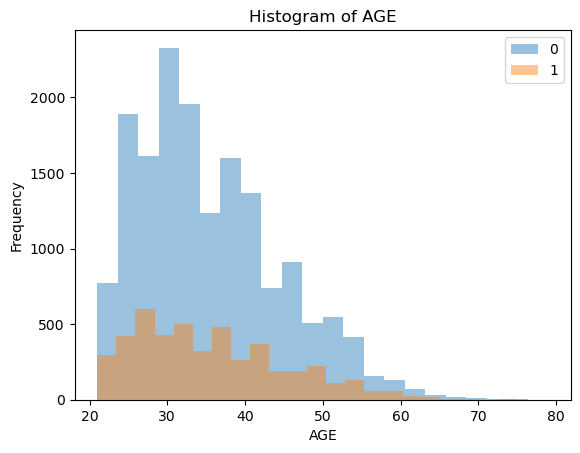

In [264]:
feat = "AGE"
train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=22, alpha=0.45, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

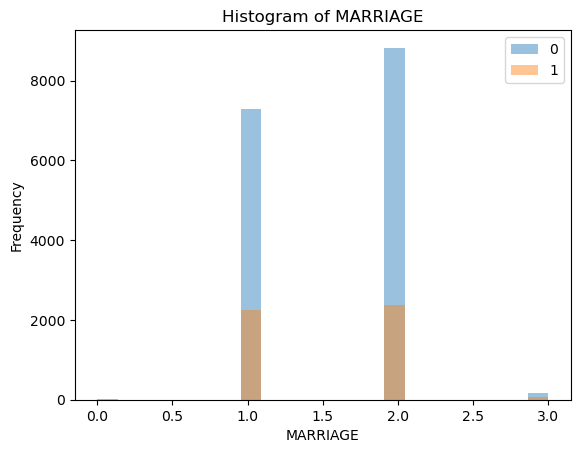

In [265]:
feat = "MARRIAGE"
train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=22, alpha=0.45, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

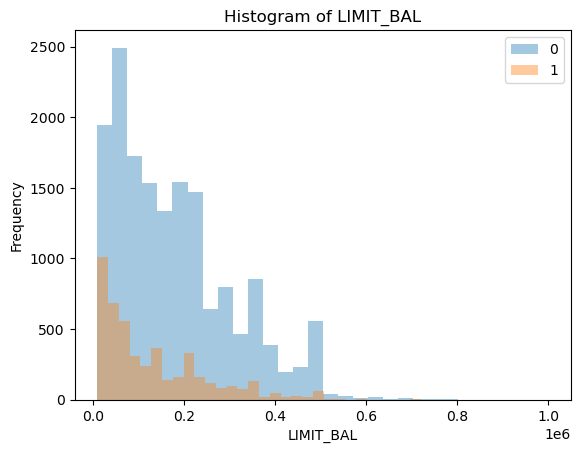

In [266]:
feat = "LIMIT_BAL"
train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=30, alpha=0.4, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

In [267]:
...

Ellipsis

**Trying to determine if it is a class imbalance problem:**

Given that this is a classification problem, the metrics we can use for assessment, as discussed in class, include score, precision, recall, F1 score, AUC, and ROC. However, since this is a class imbalance problem, relying on score alone may not be advisable. For example, our baseline model—a dummy classifier—yields a training score of 0.78, which can be quite misleading. Therefore, recall emerges as the most suitable metric for this dataset.

Prioritizing recall enables us to address the issue of false negatives effectively. In the context of default detection, it is more critical to avoid false negatives than false positives. While a higher false positive rate might mean being stringent on default-indicative activity, it is far more detrimental to let a customer go undetected and subsequently default. By focusing on recall as our primary metric, we aim to minimize the occurrence of missed defaults. Identifying as many true defaults as possible is essential for mitigating financial risk, even if it results in flagging some non-defaulting customers. By maximizing recall, the model can capture most high-risk cases, aligning with our objective of reducing credit losses due to undetected defaults.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->
In our feature engineering process, we focused on creating new features to highlight patterns in client behavior, while also renaming a column for consistency. First, we renamed PAY_0 to PAY_1 to align the naming conventions across repayment months (PAY_1 through PAY_6). Then, we introduced a feature called PAY_STATUS, which is the average of these six repayment statuses and serves as a single measure of a client's overall payment behavior—higher values here indicate a tendency toward delayed payments, which could signal an increased risk of default.

To capture average financial activity, we calculated AVG_BILL, representing the average bill amount over six months, and AVG_PAY_AMT, which gives the average payment amount. From these, we created a new feature called AVG_BILL_REMAINDER, which is the difference between AVG_BILL and AVG_PAY_AMT. This feature reflects the average unpaid balance each month, potentially indicating financial stress when the value is high. Finally, we streamlined the dataset by dropping AVG_BILL and AVG_PAY_AMT, keeping only the most insightful features for modeling. Altogether, these engineered features provide a more focused view of each client’s financial health, which will be useful as we move into analysis and model training.
<br><br>

In [268]:
train_df = train_df.rename(columns={'PAY_0': 'PAY_1'})
test_df = test_df.rename(columns={'PAY_0': 'PAY_1'})

payment_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_df['PAY_STATUS'] = train_df[payment_cols].mean(axis=1)
test_df['PAY_STATUS'] = test_df[payment_cols].mean(axis=1)



def add_average_columns(df):
    df['AVG_BILL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1).round(1)
    df['AVG_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1).round(1)
    df['AVG_BILL_REMAINDER'] = df['AVG_BILL'] - df['AVG_PAY_AMT']

# Apply the function to both test and train splits
add_average_columns(test_df)
add_average_columns(train_df)

train_df.drop(columns={"AVG_BILL", "AVG_PAY_AMT"})
test_df.drop(columns={"AVG_BILL", "AVG_PAY_AMT"})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   SEX                         21000 non-null  int64  
 2   EDUCATION                   21000 non-null  int64  
 3   MARRIAGE                    21000 non-null  int64  
 4   AGE                         21000 non-null  int64  
 5   PAY_1                       21000 non-null  int64  
 6   PAY_2                       21000 non-null  int64  
 7   PAY_3                       21000 non-null  int64  
 8   PAY_4                       21000 non-null  int64  
 9   PAY_5                       21000 non-null  int64  
 10  PAY_6                       21000 non-null  int64  
 11  BILL_AMT1                   21000 non-null  float64
 12  BILL_AMT2                   21000 non-null  float64
 13  BILL_AMT3                   2100

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

The different types of features we have consist of primarily numerical features (PAY_X, BILL_AMTX, PAY_AMTX, AVG_BILL, etc.) and then some categorical data like SEX, EDUCATION, and MARRIAGE. Therefore, the transformations that will be particularly important to us are scaling (for numerical features), imputation (in case there are any missing values), and categorical transformations like One-Hot Encoding and Ordinal Encoding. We do not have any text data at all, so it would be wrong for us to use a CountVectorizer transformer or the like. 
- Starting with imputation (as this is the transformation) that should be done first, there doesn't seem to be any NaN, Inf, or missing values in our dataset that would require imputing with e.g. a default value, even with the newly added features from the previous stage. Therefore, we do not need to apply imputation.
- Scaling is required as we have a bunch of numeric features and we may want equal importance between AGE, PAY_AMTX, and BILL_AMTX if they're all relatively equally predictive features. If we were using a Decision Tree, this wouldn't be an issue, but with models like KNN and Linear Models, it's a must to do this. - We have two categorical data features that clearly don't have an order to them, so we should apply a One-Hot-encoding to those features. That is SEX and MARRIAGE should be one-hot encoded. We should also one-hot encode whether It would be bad if they were left as integers as that would imply a ranking in the predictions.
- Education is something that inherently has a ranking and order, but is already ordinal-encoded in the vanilla dataset as is, so we will leave it untouched. We also have PAY_X which is already have an ordinal encoding (with higher numbers indicating a higher severity in late payments) so this is fine.

For our newly feature-engineered features, we have AVG_BILL, AVG_PAY_AMT, and AVG_BILL_REMAINDER that need to be scaled (as they are plainly numerical) and PAY_STATUS is fine as it has proper scale relative to ordinal data of PAY_X.

In [269]:
# Checking if there are any infinity values after averaging
any_inf = np.isinf(train_df).sum()

# Checking if there are any nan values after averaging
any_nan = np.isnan(train_df).sum()

# Check if there's any missing values at all
has_missing = train_df.isnull().values.any()
display("Is there any missing values: " + str(has_missing))

display("Table of infinity counts in training data")
display(any_inf)
display("Table of NaN counts in training data")
display(any_nan)

'Is there any missing values: False'

'Table of infinity counts in training data'

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
PAY_STATUS                    0
AVG_BILL                      0
AVG_PAY_AMT                   0
AVG_BILL_REMAINDER            0
dtype: int64

'Table of NaN counts in training data'

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
PAY_STATUS                    0
AVG_BILL                      0
AVG_PAY_AMT                   0
AVG_BILL_REMAINDER            0
dtype: int64

In [270]:
X_train = train_df.drop(columns= ["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(columns= ["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

categorical_features = ['SEX', 'MARRIAGE']# one-hot encode nominal features
numeric_features = ['LIMIT_BAL', 'AGE',
                    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                    'AVG_BILL', 'AVG_PAY_AMT', 'AVG_BILL_REMAINDER']
passthrough_features = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_STATUS','EDUCATION']

numeric_data_pipeline = make_pipeline(StandardScaler())
categorical_data_pipeline = OneHotEncoder(drop="if_binary") # SEX is binary
    
preprocessor = make_column_transformer(
    (numeric_data_pipeline, numeric_features),
    (categorical_data_pipeline, categorical_features),
    ("passthrough", passthrough_features)
)

preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'AVG_BILL', 'AVG_PAY_AMT',
                                  'AVG_BILL_REMAINDER']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['SEX', 'MARRIAGE']),
                                ('passthrough', 'passthrough',
                                 ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6', 'PAY_STATUS', 'EDUCATION'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [271]:
pipe_dummy = make_pipeline(preprocessor, DummyClassifier(random_state=123))
cv_scores = cross_validate(pipe_dummy, X_train, y_train, return_train_score = True, scoring = 'recall')
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.2550,0.0067,0.0000,0.0000
1,0.0291,0.0054,0.0000,0.0000
2,0.0114,0.0043,0.0000,0.0000
3,0.0086,0.0039,0.0000,0.0000
4,0.0097,0.0041,0.0000,0.0000


In [272]:
pipe_dummy.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe_dummy.predict(X_test)

# Calculate recall
dummy_test_recall = recall_score(y_test, y_pred)
dummy_test_recall

0.0

With DummyClassifer as our model, and recall as our scoring metric, we recive a score of 0 on both our training and test data. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

With no optimization:

In [273]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression())
scoring = ["accuracy", "recall"]
cv_scores = cross_validate(pipe_lr, X_train, y_train, return_train_score = True, scoring = scoring)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
0,0.0932,0.0052,0.8090,0.8125,0.2519,0.2597
1,0.0599,0.0044,0.8093,0.8106,0.2455,0.2471
2,0.0771,0.0047,0.8110,0.8098,0.2473,0.2413
3,0.0568,0.0044,0.8126,0.8087,0.2505,0.2357
4,0.0623,0.0052,0.8062,0.8111,0.2217,0.2461


In [274]:
...

Ellipsis

In [275]:
pipe_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'AVG_BILL', 'AVG_PAY_AMT',
                                                   'AVG_BILL_REMAINDER']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SEX', 'MARRIAGE']),
                                                 ('passthrough', 'passthrough',
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'PAY_STATUS',
                                                   'EDUCATION'])])),
                ('logisticregression', LogisticRegression())])

With Hyperparameter optimization:

In [276]:
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Use the correct step name
}
pipe_lr_optimization = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced'))
scoring = ["accuracy", "recall"]
gs = GridSearchCV(pipe_lr_optimization, 
                  param_grid=param_grid, 
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring=scoring,
                  refit = 'recall'
                 )

gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6',
                                                                          'AVG_BILL',
                                                                          'AVG_PAY_AMT',
                                                                          'AVG_BILL_...
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['SEX',
                                                                          'MARRIAGE']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['PAY_1',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'PAY_STATUS',
                                                                          'EDUCATION'])])),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]},
             refit='recall', return_train_score=True,
             scoring=['accuracy', 'recall'])

In [277]:
print("Best Score:", gs.best_score_)
print("Best Parameters:", gs.best_params_)

Best Score: 0.6437671377826525
Best Parameters: {'logisticregression__C': 1}


In [278]:
results = gs.cv_results_
results_df = pd.DataFrame(results)
selected_columns = ['params', 'mean_test_recall', 'std_test_recall', 'mean_train_recall', 'std_train_recall']
results_subset = results_df[selected_columns]

# Better formatting for display
print("Results from GridSearchCV:")
# Set display options for better readability
pd.set_option('display.float_format', '{:.4f}'.format)
print(results_subset.to_string(index=False))

Results from GridSearchCV:
                          params  mean_test_recall  std_test_recall  mean_train_recall  std_train_recall
{'logisticregression__C': 0.001}            0.6282           0.0172             0.6278            0.0040
 {'logisticregression__C': 0.01}            0.6406           0.0133             0.6425            0.0026
  {'logisticregression__C': 0.1}            0.6427           0.0144             0.6445            0.0028
    {'logisticregression__C': 1}            0.6438           0.0147             0.6450            0.0031
   {'logisticregression__C': 10}            0.6433           0.0150             0.6449            0.0030
  {'logisticregression__C': 100}            0.6433           0.0150             0.6452            0.0028
 {'logisticregression__C': 1000}            0.6433           0.0150             0.6453            0.0028


The results highlight the significance of adjusting for class imbalance and fine-tuning regularization to optimize model recall and stability. In our analysis, the best-performing configuration achieved a recall score of 0.6438 with class_weight='balanced' and a regularization parameter C=1. This configuration emphasizes the necessity of compensating for data imbalance, as models with class_weight=None generally performed worse (refer to the no optimization model). The moderate regularization at C=1 provided a solid balance between model complexity and generalization, with a training recall of 0.6450. Also, this does not seem to be the case of over-fitting since the difference between mean cv test score and cv train score is very small.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

1) The three models we will test are DecisionTreeClassifier (with unlimited max_depth), RandomForestClassifier (the tree-based ensemble with max_depths of 10), and SVC (support vector machine classifier).
2) We will summarize our results in a cell below.

In [279]:
dt_clf = DecisionTreeClassifier(random_state=123, class_weight='balanced') # Use unspecified max_depth to minimize impurity
dt_pipeline = make_pipeline(preprocessor, dt_clf)

dt_results = cross_validate(dt_pipeline, X_train, y_train,
                            scoring='recall',
                            return_train_score=True,
                            n_jobs=-1) # Do default 5-fold cv

display(pd.DataFrame(dt_results))
display(f'Decision Tree mean fit time is {np.mean(dt_results['fit_time'])}')
display(f'Decision Tree mean score time is {np.mean(dt_results['score_time'])}')
display(f'Decision Tree mean test score is {np.mean(dt_results['test_score'])}')
display(f'Decision Tree mean train score is {np.mean(dt_results['train_score'])}')
display(f'Decision Tree SD test score is {np.std(dt_results['test_score'])}')
display(f'Decision Tree SD train score is {np.std(dt_results['train_score'])}')

,fit_time,score_time,test_score,train_score
0,0.5226,0.0084,0.4023,1.0000
1,0.5278,0.0057,0.3949,1.0000
2,0.4496,0.0063,0.4104,1.0000
3,0.4435,0.0061,0.3849,1.0000
4,0.4672,0.0071,0.3518,1.0000


'Decision Tree mean fit time is 0.4821321487426758'

'Decision Tree mean score time is 0.00670928955078125'

'Decision Tree mean test score is 0.3888693443895024'

'Decision Tree mean train score is 1.0'

'Decision Tree SD test score is 0.02036014901606133'

'Decision Tree SD train score is 0.0'

In [280]:
svc_clf = SVC(random_state=123)
svc_pipeline = make_pipeline(preprocessor, svc_clf)

svc_results = cross_validate(svc_pipeline, X_train, y_train,
                            scoring='recall',
                            return_train_score=True,
                            n_jobs=-1) # Do default 5-fold cv
display(pd.DataFrame(svc_results))
display(f'SVC mean fit time is {np.mean(svc_results['fit_time'])}')
display(f'SVC mean score time is {np.mean(svc_results['score_time'])}')
display(f'SVC mean test score is {np.mean(svc_results['test_score'])}')
display(f'SVC mean train score is {np.mean(svc_results['train_score'])}')
display(f'SVC SD test score is {np.std(svc_results['test_score'])}')
display(f'SVC SD train score is {np.std(svc_results['train_score'])}')

,fit_time,score_time,test_score,train_score
0,11.4351,2.1287,0.3394,0.3580
1,11.2880,2.0796,0.3479,0.3602
2,11.4773,2.1719,0.3539,0.3637
3,11.3928,2.0773,0.3593,0.3544
4,11.4764,2.0814,0.3380,0.3611


'SVC mean fit time is 11.413925313949585'

'SVC mean score time is 2.107783842086792'

'SVC mean test score is 0.347694520233108'

'SVC mean train score is 0.3594816955478539'

'SVC SD test score is 0.008212577147136859'

'SVC SD train score is 0.0031295838843697727'

In [295]:
rf_clf = RandomForestClassifier(max_depth=10,random_state=123, class_weight='balanced') # Use default n_estimators=100 and unspecified max_depth to minimize impurity
rf_pipeline = make_pipeline(preprocessor, rf_clf)

rf_results = cross_validate(rf_pipeline, X_train, y_train,
                            scoring='recall',
                            return_train_score=True,
                            n_jobs=-1) # Do default 5-fold cv
display(pd.DataFrame(rf_results))
display(f'Random Forests\' mean fit time is {np.mean(rf_results['fit_time'])}')
display(f'Random Forests\' mean score time is {np.mean(rf_results['score_time'])}')
display(f'Random Forests\' mean test score is {np.mean(rf_results['test_score'])}')
display(f'Random Forests\' mean train score is {np.mean(rf_results['train_score'])}')
display(f'Random Forests\' SD test score is {np.std(rf_results['test_score'])}')
display(f'Random Forests\' SD train score is {np.std(rf_results['train_score'])}')

,fit_time,score_time,test_score,train_score
0,3.3060,0.0489,0.5368,0.6740
1,3.3325,0.0573,0.5560,0.6806
2,3.3267,0.0562,0.5576,0.6829
3,3.3174,0.0542,0.5597,0.6859
4,3.3188,0.0589,0.5490,0.6832


"Random Forests' mean fit time is 3.3202962398529055"

"Random Forests' mean score time is 0.05509681701660156"

"Random Forests' mean test score is 0.5518321640767045"

"Random Forests' mean train score is 0.6813144228205811"

"Random Forests' SD test score is 0.008314218497721073"

"Random Forests' SD train score is 0.004038936326095297"

**Decision Tree Summary**: The decision tree was able to be trained and do predictions very fast as evidenced by its mean fit time of `~0.439` and mean score time of `~0.006`. However, comparatively, it performed rather poorly compared to the other to the linear model (Logistic Regression) and Random Forests. This is partly due to the `max_depth` hyperparameter being unlimited, leading to the model overfitting as the mean train score is `1.0` while the mean test score is very low at around `~0.388`. Therefore, we'd benefit from tuning the `max_depth` hyperparameter towards something more sensible like `10` to reduce the complexity of the model.

**SVC Summary**: The SVC model struggled on all fronts. It had a very long mean fit time of around `~8.5s` and the score time was also quite long at `~2.08s`. Despite the long time to train and make predictions with this model, it still did poorly on the test and train sets, especially compared to the linear model and the other tree-based models here. Given that the 
mean test score and train score are essentially identical (around `~0.35`), this indicates that the model is severely underfitting, and we'd likely benefit from tuning the `C` and/or `gamma` hyperparameters to increase the complexity of the model. 

**Random Forest Summary**: The Random Forest model did pretty poorly but not as bad as the SVC and Decision Tree models. However, it did worse than the linear model so no improvement there. The training time of the random forest took some time; at about `3s` for about `100` estimators for `max_depth=10` is reasonable. The mean scoring time was quite decent at about `~0.036s` which isn't bad. But the model on the test sets in CV did pretty bad with a score of `~0.55` on average. Compared to the mean train score of `~0.68`, this indicates there's some overfitting at play, and that we could maybe reduce the model's complexity via hyperparameter optimization to get better test scores and generalization ability.

Overall, these models didn't beat the linear model with a mean test score of `~0.64`. They could benefit from hyperparameter optimization to combat overfitting/underfitting or some modifications to the dataset to make them more tenable for analogy-based models like SVC or tree-based models like Random Forests.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

We will be using RFECV to perform feature selection and we will be applying it to a linear model. After doing recursive feature elimination with the linear model, we will then perform cross-validation with our hyperparameter-optimized linear model in #7 that performed well, to determine whether we should indeed carry out the feature selection.

In [322]:
# Code adapted from CPSC 330 L6 and L14
rfecv_lr_estimator = LogisticRegression(random_state=123) # Use LR as our estimator
rfecv_selector = RFECV(rfecv_lr_estimator, scoring='recall') # Use recall as our scoring metric and default 5-fold cv

best_lr_model = LogisticRegression(C=1.0, class_weight="balanced")
rfecv_pipe = make_pipeline(preprocessor, rfecv_selector, best_lr_model)

rfecv_cv_results = cross_validate(rfecv_pipe, X_train, y_train, scoring='recall', return_train_score=True)
rfecv_df = pd.DataFrame(rfecv_cv_results)

display(rfecv_df)
display('Mean test score: ' + str(np.mean(rfecv_df['test_score'])))
display('Mean train score: ' + str(np.mean(rfecv_df['train_score'])))

feature_names = np.array(
    numeric_features
    + passthrough_features    
    + preprocessor.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
rfecv_pipe.fit(X_train, y_train)
display("Feature Selection yielded: " + str(list(feature_names[rfecv_pipe['rfecv'].support_])))

,fit_time,score_time,test_score,train_score
0,3.8716,0.0057,0.5155,0.5183
1,3.6396,0.0045,0.5048,0.5209
2,3.9774,0.0047,0.5203,0.5171
3,3.8024,0.0088,0.5362,0.5131
4,3.5212,0.0052,0.5117,0.5195


'Mean test score: 0.5177015517017747'

'Mean train score: 0.5177579098906958'

"Feature Selection yielded: ['PAY_2', 'PAY_6']"

**Do we perform feature selection in the pipeline?** According to the results we get when displaying the cross-validation results after performing recursive feature elimination with our best logistic regression model, we find that the test scores are quite a bit lower than what we initially got with no feature selection. That is, with our original model and features, we would get a test score of around ~0.64 whereas now we are getting a mean test score of about 0.518. This signifies that the removed features, PAY_2 and PAY_6 are actual predictive features and should be kept in to keep model performance high. Thus, we;ll be abandoning feature selection in our pipeline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

We will be hyperparameter optimizing the three models that we've used in #8. That is, we'll be hyperparameter optimizing the DecisionTreeClassifer, the RandomForestClassifier, and the SVC model. We will primarily be using RandomizedSearchCV as it tends to produce the best results from our experience but we will also use GridSearchCV.
    

In [323]:
# Hyperparameter optimization of Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=123)
dt_pipeline = make_pipeline(preprocessor, dt_clf)

param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20],
    'decisiontreeclassifier__class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(dt_pipeline, param_distributions=param_grid, return_train_score=True,
                  scoring='recall', n_jobs=-1)

random_search.fit(X_train, y_train)
random_search_results = pd.DataFrame(random_search.cv_results_)[
    ["mean_test_score", "rank_test_score", "param_decisiontreeclassifier__max_depth",
     "param_decisiontreeclassifier__class_weight"]
].set_index("rank_test_score").sort_index().T
display(random_search_results)
    

Ellipsis

In [324]:
# Hyperparameter optimization of Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=123, class_weight='balanced')
rf_pipeline = make_pipeline(preprocessor, rf_clf)

param_grid = {
    'randomforestclassifier__max_depth': [None, 5, 10, 15, 20],
    'randomforestclassifier__n_estimators': [10, 50, 100, 150, 200],
    'randomforestclassifier__min_samples_split': [2, 4, 6, 8, 10],
    
}

random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid, return_train_score=True,
                  scoring='recall', n_jobs=-1)

random_search.fit(X_train, y_train)
random_search_results = pd.DataFrame(random_search.cv_results_)[
    ["mean_test_score", "rank_test_score", "param_randomforestclassifier__max_depth",
     "param_randomforestclassifier__n_estimators", "param_randomforestclassifier__min_samples_split"]
].set_index("rank_test_score").sort_index().T
display(random_search_results)

Ellipsis

In [325]:

# Hyperparameter optimization of Random Forest Classifier
svc_clf = SVC(random_state=123, class_weight='balanced')
svc_pipeline = make_pipeline(preprocessor, svc_clf)

param_grid = {
    'svc__gamma': [0.1, 1, 10, 100] # Too many parameters here takes too long to run
}

random_search = GridSearchCV(svc_pipeline, param_grid, return_train_score=True,
                  scoring='recall', n_jobs=-1)

random_search.fit(X_train, y_train)
random_search_results = pd.DataFrame(random_search.cv_results_)[
    ["mean_test_score", "rank_test_score",
     "param_svc__gamma"]
].set_index("rank_test_score").sort_index().T
display(random_search_results)

Ellipsis

Summary of results: After performing hyperparameter optimization, it seems that every model has substantially benefited and has achieved much better performance than before. 
For Decision Trees, we have a substantial improvement when we found a model that has max_depth=10 and balanced class weights, leading to a mean test score of 0.59 which is substantially better than our old non-optimized score of 0.388. By lowering the max_depth and using class_weight='balanced' we were able to combat the overfitting we were experiencing previously.
For Random Forests, we don't have as much of a substantial improvement as we did with decision trees, but we still managed to decently improve the model from a mean test score of 0.55 to ~0.611. This managed to slightly increase our generalization ability by shifting the complexity from max_depth (from 10 to 5) to n_estimators (from 100 to 150) and increasing min_samples_split (from 2 to 6), thus likely combatting a bit of underfitting in my estimation.
For SVC, we managed to get a massive improvement from a measly mean test score of 0.35 to 0.577. By performing hyperparameter optimization, we can fit the data much better by increasing the model complexity with a new, lower gamma hyperparameter. We can likely yield better results with doing hyperparameter optimization alongside C as well but sadly it takes far too long on my computer.

In [327]:
...

Ellipsis

In [328]:
...

Ellipsis

In [329]:
...

Ellipsis

In [330]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

I will be using shap to examine the most important features of the RandomForestClassifier with the optimized hyperparameters from part 10. 

NOTE: This is adapted from Lecture 13 code. 

In [354]:
!pip install shap

In [355]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_4,PAY_5,PAY_6,PAY_STATUS,EDUCATION,SEX_2,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
16396,1.1684,0.0542,-0.3007,-0.2934,-0.2653,-0.3719,-0.4948,-0.5870,-0.0395,-0.0402,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
21449,2.0900,-0.5971,-0.6853,-0.6795,0.5854,1.9703,1.8055,1.3275,-0.2972,3.7398,...,1.0000,0.0000,-1.0000,-1.0000,-1.0000,0.0000,0.0000,0.0000,-0.5000,1.0000
20035,-0.0605,0.9226,-0.6961,-0.6883,-0.6812,-0.6709,-0.6610,-0.6509,-0.3331,-0.2704,...,0.0000,0.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,3.0000
25756,-0.3677,-0.5971,0.6875,0.7526,0.8356,0.9187,0.5012,0.1445,-0.1155,-0.0180,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000
1439,-0.9054,2.0081,-0.0402,-0.0314,-0.2874,-0.2452,-0.2046,-0.1911,-0.3331,-0.2062,...,1.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.5000,2.0000


In [356]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_4,PAY_5,PAY_6,PAY_STATUS,EDUCATION,SEX_2,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
25666,-0.9822,-1.0313,-0.3011,-0.3464,-0.4840,-0.6707,0.0588,-0.3368,-0.2568,-0.2245,...,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,-1.0000,0.0000,-0.3333,2.0000
16465,-0.6750,2.5508,0.3343,0.2934,0.0892,0.1139,0.1625,0.1796,-0.1445,-0.1738,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
22387,0.0163,-0.5971,1.4270,1.5363,1.6583,1.7595,2.0865,2.2179,0.0661,0.0277,...,1.0000,0.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000
10150,0.2467,0.5969,-0.3750,-0.6778,-0.6810,-0.6707,-0.6608,-0.6506,-0.2895,-0.2704,...,0.0000,0.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,2.0000
8730,-0.9054,0.8140,-0.5840,-0.5755,-0.5500,-0.5284,-0.5068,-0.4892,-0.2662,-0.2177,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000


In [357]:
display(X_train_enc.shape)
display(X_test_enc.shape)

(21000, 30)

(9000, 30)

In [389]:
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(min_samples_split = 6, n_estimators = 150, max_depth = 5))
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'AVG_BILL', 'AVG_PAY_AMT',
                                                   'AVG_BILL_REMAINDER']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SEX', 'MARRIAGE']),
                                                 ('passthrough', 'passthrough',
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'PAY_STATUS',
                                                   'EDUCATION'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, min_samples_split=6,
                                        n_estimators=150))])

In [390]:
model = rf_pipeline.named_steps['randomforestclassifier']
model.fit(X_train_enc, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=150)

In [391]:
explainer = shap.TreeExplainer(model) # define the shap explainer 
train_shap_values = explainer(X_train_enc) # train shap values
test_shap_values = explainer(X_test_enc) # test shap values 

In [392]:
display(train_shap_values.shape)
display(test_shap_values.shape)
display(train_shap_values)

(21000, 30, 2)

(9000, 30, 2)

.values =
array([[[ 6.93093637e-03, -6.93093637e-03],
        [-6.49756308e-05,  6.49756308e-05],
        [ 1.92447731e-03, -1.92447731e-03],
        ...,
        [ 3.74628647e-03, -3.74628647e-03],
        [ 2.29050290e-02, -2.29050290e-02],
        [ 2.90255975e-04, -2.90255975e-04]],

       [[ 7.07231760e-03, -7.07231760e-03],
        [ 2.93869590e-04, -2.93869590e-04],
        [-2.05436757e-03,  2.05436757e-03],
        ...,
        [ 3.80677514e-03, -3.80677514e-03],
        [ 2.24101941e-02, -2.24101941e-02],
        [ 1.88036097e-04, -1.88036097e-04]],

       [[ 3.18379639e-03, -3.18379639e-03],
        [ 9.82287920e-05, -9.82287920e-05],
        [-6.77846629e-03,  6.77846629e-03],
        ...,
        [ 2.64358057e-03, -2.64358057e-03],
        [ 1.96735196e-02, -1.96735196e-02],
        [-9.12068288e-05,  9.12068288e-05]],

       ...,

       [[-1.05998417e-02,  1.05998417e-02],
        [ 2.58449680e-04, -2.58449680e-04],
        [ 2.01180094e-03, -2.01180094e-03],
        

In [393]:
shap.initjs()

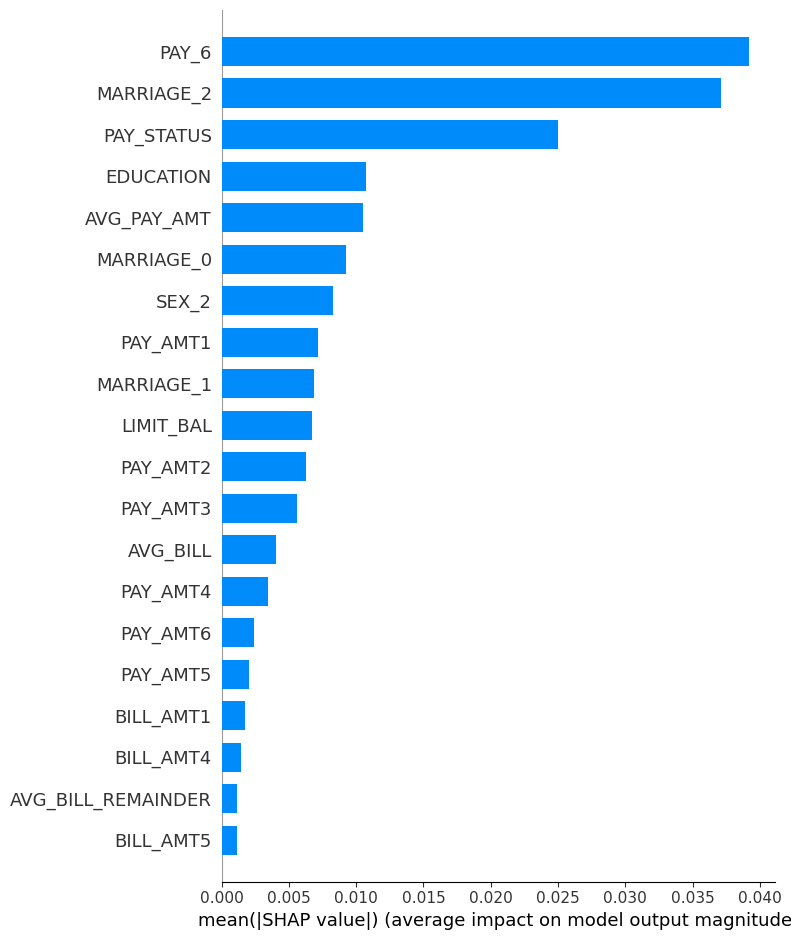

In [394]:
shap_values_class0 = train_shap_values[..., 0]
shap.summary_plot(shap_values_class0, X_train_enc, plot_type="bar")

In the SHAP analysis, we observe that a customer's repayment status in April 2005, the first month for which we have data, is a crucial predictor of default risk. This initial payment behaviour provides a foundational insight into the customer's financial reliability. If a customer begins their credit history by delaying payments, it may signal underlying financial difficulties that persist over time, making them more likely to default later on. (In question 9, feature selection, one of the features we thought of removing was, comically, PAY_6, but we didn't as removing it negatively impacted our model performance.) 

Interestingly, while we have repayment data extending into September 2005, the significance of April's payment status outweighs that of later months. This suggests that early patterns of payment behaviour are particularly telling; a shaky start may indicate a lack of financial stability that can lead to future defaults.

Additionally, the analysis reveals that a customer's marital status is another important factor, as it might influence financial responsibilities and support systems. This was something we had predicted in Question 3, our Exploratory Data Analysis. We could see that the number of single and married who default is pretty much the same, but the total number of single people in our data was greater than the total number of married people. It is also nice to see that the features we engineered, primarily PAY_STATUS and AVG_PAY_AMT seem to have a huge impact on model output. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

The model that performed best on the test set is Logistic Regression, with the following hyperparameters: C=1.0, and class_weight="balanced"

In [399]:
best_model = LogisticRegression(C=1.0, class_weight="balanced")

In [400]:
best_model_pipe = make_pipeline(
    preprocessor,
    best_model
)

In [401]:
best_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'AVG_BILL', 'AVG_PAY_AMT',
                                                   'AVG_BILL_REMAINDER']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SEX', 'MARRIAGE']),
                                                 ('passthrough', 'passthrough',
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'PAY_STATUS',
                                                   'EDUCATION'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [402]:
y_pred = best_model_pipe.predict(X_test)
best_model_recall = recall_score(y_test, y_pred)
best_model_recall
print("Test Recall: %0.3f" % best_model_recall)

Test Recall: 0.648


Our best model, Logistic Regression, achieved a recall of 64.8% on the test data, which is slightly better than the 64.37% recall obtained during hyperparameter optimization. This outcome is a positive indication that our model likely does not suffer from optimization bias and demonstrates good generalization to unseen data. Given our dataset of 21,000 instances, the cross-validation recall scores obtained earlier and the current test score are reliable estimates of the model’s potential performance on deployment data.

We do not believe optimization bias is a concern, as our validation set was only tested a total of 35 times for Logistic Regression. However, we remain slightly cautious about the possibility of data leakage. While we thoroughly reviewed our data splits, transformations, and model fits to prevent any breaches of the golden rule, we acknowledge that there is always a slight risk of unintentional leakage when working with multiple models under time constraints.

We do not believe that we have encountered issues with optimization bias in our analysis. The dataset we utilized consisted of 21,000 instances, and during the hyperparameter tuning for Logistic Regression, our validation set was only evaluated a total of 35 times. This limited exposure to the validation set reduces the likelihood of our model being overly fitted to that specific subset of data. Consequently, the test scores align well with the validation scores, reinforcing our confidence in the model's generalizability and reliability on unseen data.

In [403]:
...

Ellipsis

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0])

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


[[0.68877256 0.31122744]]


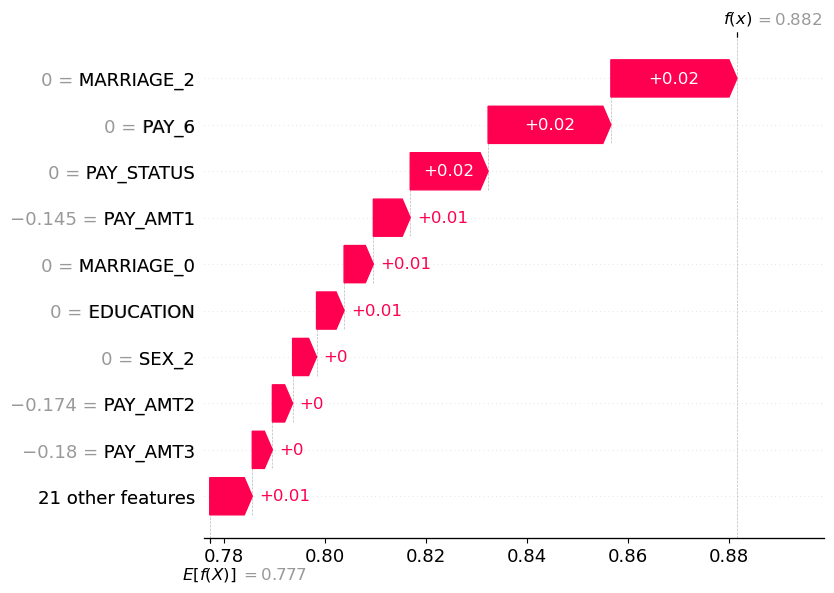

In [427]:
X_test_transform = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_transform.loc[X_test_transform.index[0]]
point = pd.DataFrame(X_test_transform.iloc[0]).T
prediction = best_model.predict(point)
display(prediction)
prediction_prob = best_model.predict_proba(sample_point)
print(prediction_prob)
shap.plots.waterfall(test_shap_values[1][:, 0])

Similar to our SHAP analysis using the RandomForestClassifier with our training data, our SHAP analysis indicates that, using the Logistic Regression model on test data, the features MARRIAGE_2, PAY_6, and PAY_STATUS all equally influence the model output. MARRIAGE_2, which indicates whether a customer is married, may seem counterintuitive as it suggests that marital status correlates with financial stability or support systems affecting credit behavior. In contrast, PAY_6 and PAY_STATUS reflect recent payment behavior, with PAY_6 capturing repayment status from April 2005, setting the tone for future obligations. A delayed payment indicated by PAY_6 significantly contributes to the model's prediction of default, highlighting the importance of early payment behavior.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [293]:
...

Ellipsis

In [294]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised machine learning material we've covered so far is the crucial role of data quality and preparation in model performance. Initially, I thought that selecting the right algorithm and fine-tuning its hyperparameters were the most significant factors. However, I’ve learned that thorough data cleaning, scaling, and feature engineering can dramatically enhance a model's effectiveness.

It's not just about collecting data; it's about ensuring it's well-prepared and relevant to the task at hand. This includes crafting new features that can better capture the underlying patterns in the data, which is essential for optimizing metrics like accuracy and recall. Additionally, I’ve come to appreciate the delicate balance between model complexity and generalization. Understanding concepts like overfitting and underfitting has highlighted the importance of techniques like cross-validation and hyperparameter tuning to develop models that perform reliably on unseen data.

Ultimately, success in machine learning requires a comprehensive understanding of data insights and thoughtful experimentation, underscoring that achieving robust and accurate predictions involves much more than simply applying algorithms.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)